## Exploratory data analysis (part 2)
Unsupervised learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets, cluster
from matplotlib import pyplot as plt
from scipy import ndimage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

In [3]:
print(X[0:5])

[[2.60509732 1.22529553]
 [0.5323772  3.31338909]
 [0.802314   4.38196181]
 [0.5285368  4.49723858]
 [2.61858548 0.35769791]]


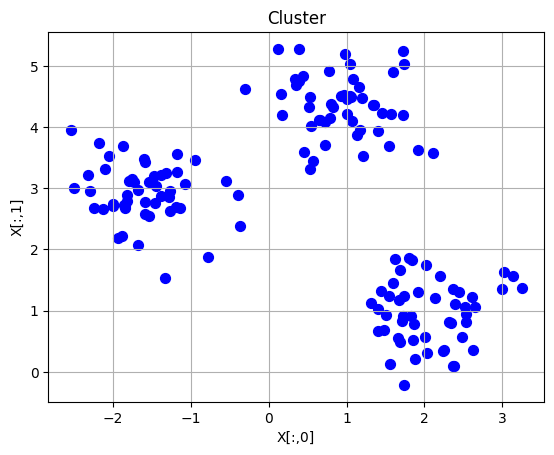

In [4]:
plt.scatter(X[:,0], X[:,1],
                  c = 'blue',
                  marker='o',
                  s=50)


plt.xlabel('X[:,0]')
plt.ylabel('X[:,1]')
plt.title('Cluster')
plt.grid()
plt.show()

### K-Means
It requires that we know the number of clusters

In [5]:
km = KMeans(n_clusters=3,
            init= 'random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

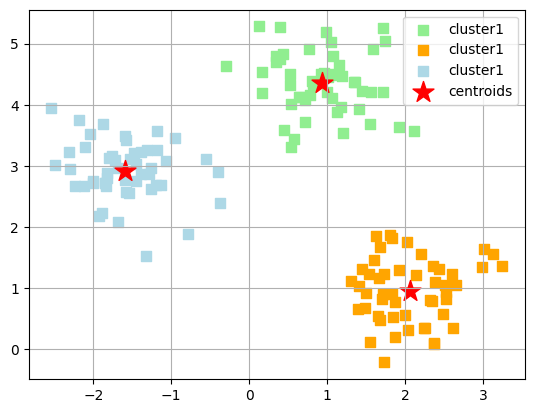

In [6]:
plt.scatter(X[y_km==0, 0], 
            X[y_km==0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster1'
            )

plt.scatter(X[y_km==1, 0], 
            X[y_km==1, 1],
            s=50,
            c='orange',
            marker='s',
            label='cluster1'
            )

plt.scatter(X[y_km==2, 0], 
            X[y_km==2, 1],
            s=50,
            c='lightblue',
            marker='s',
            label='cluster1'
            )

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')

plt.legend()
plt.grid()
plt.show()


In [7]:
# Example: why we need to know numbers of clusters
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=5,        # Numbers of clusters
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

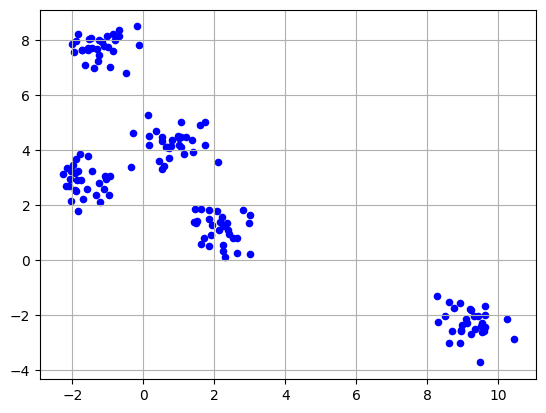

In [8]:
plt.scatter(X[:,0], X[:,1],
            c='blue',
            marker='o',
            s=20)

plt.grid()
plt.show()

In [9]:
km = KMeans(n_clusters=4)

y_km = km.fit_predict(X)

c:\Users\ellins\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


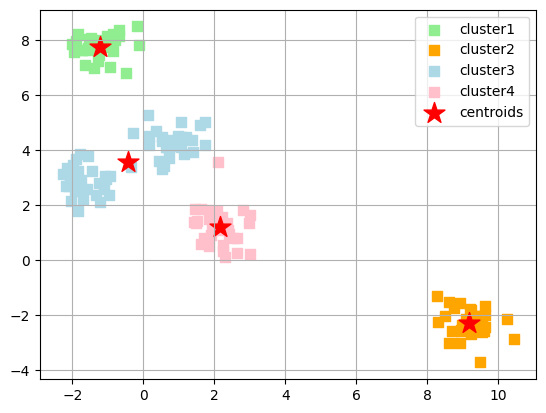

In [10]:
plt.scatter(X[y_km==0, 0], 
            X[y_km==0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster1'
            )

plt.scatter(X[y_km==1, 0], 
            X[y_km==1, 1],
            s=50,
            c='orange',
            marker='s',
            label='cluster2'
            )

plt.scatter(X[y_km==2, 0], 
            X[y_km==2, 1],
            s=50,
            c='lightblue',
            marker='s',
            label='cluster3'
            )

plt.scatter(X[y_km==3, 0], 
            X[y_km==3, 1],
            s=50,
            c='pink',
            marker='s',
            label='cluster4'
            )

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')

plt.legend()
plt.grid()
plt.show()


In [11]:
distortion = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init='k-means++', n_init=10)
    km.fit(X)
    distortion.append(km.inertia_)

distortion


[4025.5213425664347,
 1066.9375829493076,
 442.3018513458501,
 191.97966183852085,
 70.70301191871754,
 64.31955988290909,
 58.107951977697844,
 54.08413213370934,
 48.218499783891176,
 43.74519697320561]

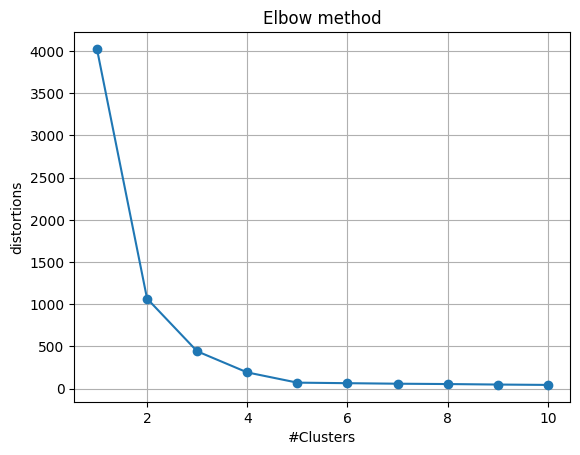

In [12]:
plt.plot(range(1,11), distortion, marker = 'o')
plt.xlabel('#Clusters')
plt.ylabel('distortions')
plt.title('Elbow method')
plt.grid()
plt.show()


### Clustering with Iris dataset

In [13]:
iris = datasets.load_iris()
X_iris = iris.data
X_iris[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

#### Elbou-method

In [14]:
distortion = []
for i in range(1,11):
    km = cluster.KMeans(n_clusters=i, n_init=10,
                         init='k-means++') # k-means ++ (default) selects initial 
                                            # cluster center for k-mean clustering
                                            # in a smart way to speed up convergence.
    km.fit(X_iris)
    distortion.append(km.inertia_)                                                        

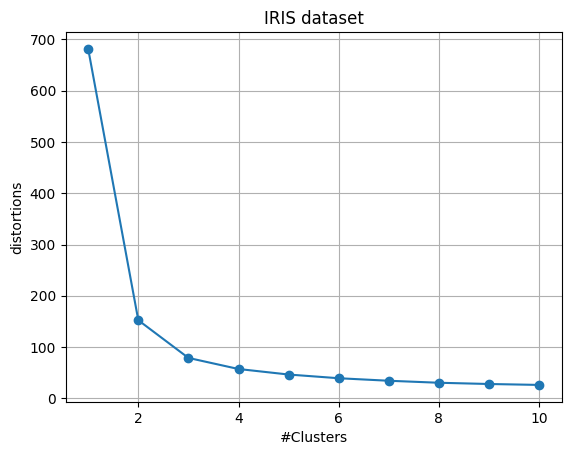

In [15]:
plt.plot(range(1,11), distortion, marker = 'o')
plt.xlabel('#Clusters')
plt.ylabel('distortions')
plt.title('IRIS dataset')
plt.grid()
plt.show()

#### k-means clustering

In [16]:
k_means = cluster.KMeans(n_clusters=3, n_init=10)
k_means.fit(X_iris)
k_means.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [17]:
# The cluster labels
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [18]:
# The cluster centroids 
k_means.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [19]:
# Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
k_means.inertia_

78.851441426146

In [20]:
unseen_data = np.array([[5.5, 2.5, 4.5, 1.5], 
                        [7.0, 3.0, 6.0, 2.0]])


In [21]:
predictions = k_means.predict(unseen_data)
print('unseen_data 1:', unseen_data[0])
print('predicted cluster:', predictions[0])
print(' ')
print('unseen_data 2:', unseen_data[1])
print('predicted cluster:', predictions[1])

unseen_data 1: [5.5 2.5 4.5 1.5]
predicted cluster: 0
 
unseen_data 2: [7. 3. 6. 2.]
predicted cluster: 2


#### Clustering in map

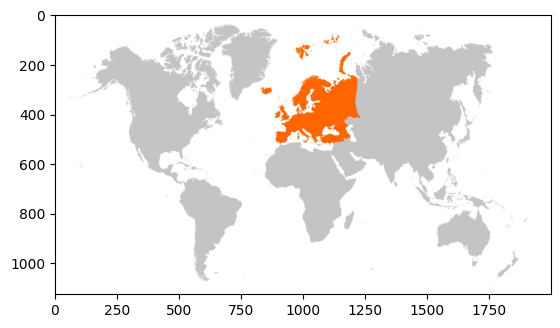

In [22]:
my_image = plt.imread('Data/europe.jpg')
plt.imshow(my_image)
plt.show()


In [23]:
x, y, z = my_image.shape
my_image_2d = my_image.reshape(x*y, z)
my_image_2d.shape

(2250000, 3)

In [24]:
kmeans = cluster.KMeans(n_clusters=2, n_init=10)
kmeans.fit(my_image_2d)
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

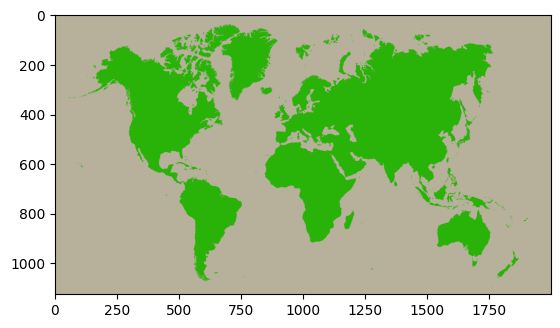

In [25]:
output = cluster_centroids[cluster_labels].reshape(x,y,z)
plt.imshow((output * 255).astype(np.uint8))

In [26]:
kmeans = cluster.KMeans(n_clusters=3, n_init=10)
kmeans.fit(my_image_2d)
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

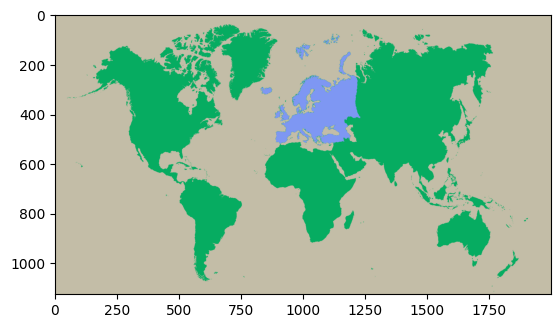

In [27]:
my_image_3d = cluster_centroids[cluster_labels].reshape(x,y,z)
plt.imshow((my_image_3d * 255).astype(np.uint8))

In [28]:
def generate_2D_clusters(n_samples, n_centers):
    n_features = 2
    X, y = make_blobs(n_samples, n_features, n_centers, cluster_std=0.5)
    return X, y

In [29]:
def predict_and_plot_2D_clusters(n_samples, n_clusters):
    X, y = generate_2D_clusters(n_samples, n_clusters)
    km = KMeans(n_clusters)
    y = km.fit_predict(X)
    for clus in range(n_clusters):
        plt.scatter(X[y==clus, 0], 
                    X[y==clus, 1], 
                    label = 'cluster')
        plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
                    s=250, marker='*', c='red', label = 'centroids')
    plt.xlabel('X[:,0]')
    plt.ylabel('X[:,1]')
    plt.title('Clusters')
    plt.grid()
    plt.show()    
    


In [42]:
# predict_and_plot_2D_clusters(250, 6)

### Principle Component Analysis (PCA)
Unsupervised transformation. Dimension reduction

In [43]:
iris
X_iris = iris.data
y_iris = iris.target

In [33]:
X_iris_stand = StandardScaler().fit_transform(X_iris)

In [34]:
print('Orgiginal Iris: \n', X_iris[:10])
print(' ')
print('Standardized Iris: \n', (X_iris_stand[:10]))

Orgiginal Iris: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
 
Standardized Iris: 
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


In [35]:
pca = PCA(n_components=2)
X_iris_PCA = pca.fit_transform(X_iris_stand)

In [36]:
print('PC1', pca.components_[0])
print(' ')
print('PC2', pca.components_[1])


PC1 [ 0.52106591 -0.26934744  0.5804131   0.56485654]
 
PC2 [0.37741762 0.92329566 0.02449161 0.06694199]


In [37]:
df_iris_pca = pd.DataFrame( data = X_iris_PCA)
df_iris_pca.columns = ['PC 1', 'PC 2']
df_iris_target = pd.DataFrame(y_iris)

df_iris_all = pd.concat([df_iris_pca, df_iris_target], axis = 1)
df_iris_all

,PC 1,PC 2,0
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


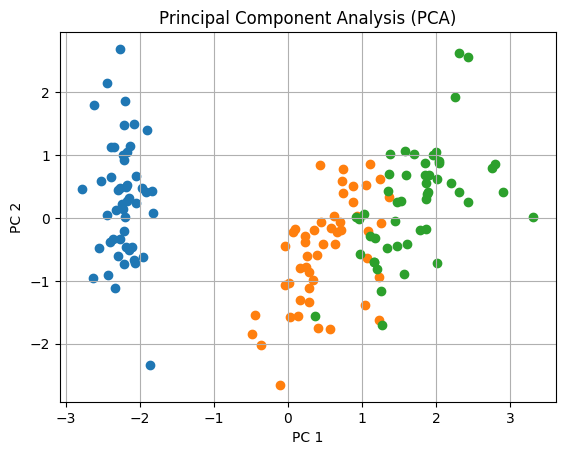

In [38]:
for i in range(0,4):
    indices = (df_iris_target.iloc[:,0] == i)
    plt.scatter(df_iris_all.loc[indices, 'PC 1'],
                df_iris_all.loc[indices, 'PC 2'])
    
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid()
plt.show()




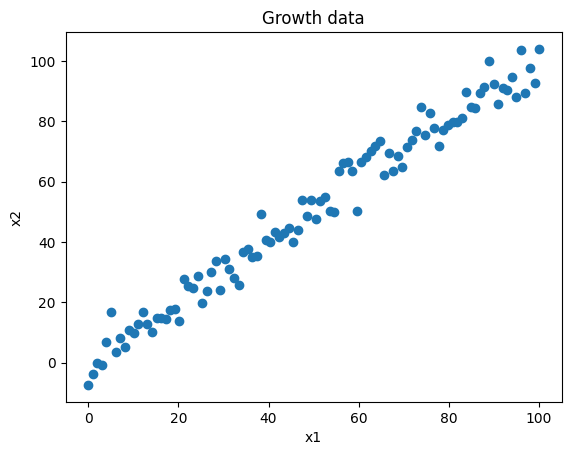

In [57]:
# Standardize df_growth
df_growth = pd.read_csv('Data/data_growth.csv')

plt.scatter(df_growth.loc[:,'x1'], df_growth.loc[:,'x2'])
plt.title('Growth data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [40]:
# Testing and show
print(df_growth.loc[:,'x1'])
print(df_growth.loc[:,'x2'])

0       0.000000
1       1.010101
2       2.020202
3       3.030303
4       4.040404
         ...    
95     95.959596
96     96.969697
97     97.979798
98     98.989899
99    100.000000
Name: x1, Length: 100, dtype: float64
0      -7.395945
1      -3.617383
2      -0.245974
3      -0.689800
4       6.996454
         ...    
95    103.527596
96     89.538815
97     97.723037
98     92.856798
99    104.022142
Name: x2, Length: 100, dtype: float64


In [55]:
# standardizing the data
df_growth_sd = StandardScaler().fit_transform(df_growth)

In [56]:
pca = PCA(n_components=2)
df_growth_pca= pca.fit_transform(df_growth_sd)

In [52]:
# Principal components (directions of maximum variance in the data)
pca.components_

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [53]:
# Percentage of variance explained by each principal components
pca.singular_values_

array([14.09814482,  1.11459082])

In [54]:
# The singular values corresponding to the principal components
pca.explained_variance_ratio_

array([0.99378844, 0.00621156])

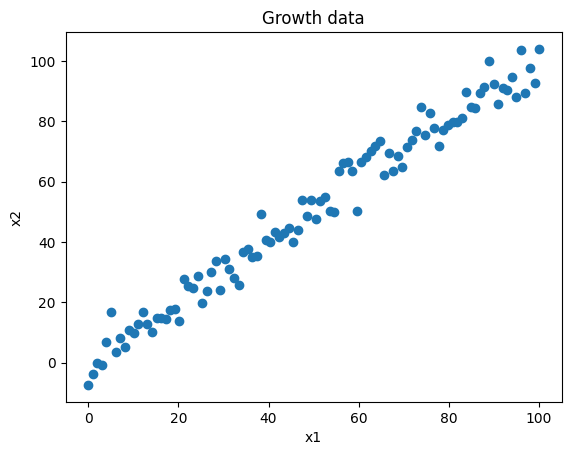

In [64]:
# Original data (before applying PCA)
plt.scatter(df_growth.loc[:,'x1'], df_growth.loc[:,'x2'])
plt.title('Growth data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

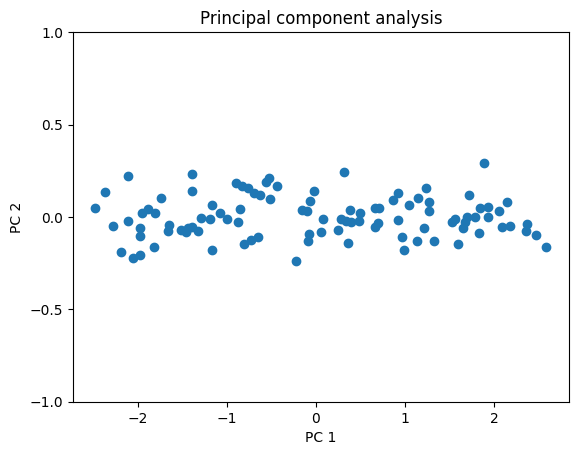

In [66]:
# Transformed data (after applying PCA)
plt.scatter(df_growth_pca[:,0], df_growth_pca[:,1])
plt.title('Principal component analysis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.yticks(np.arange(-1,1.5,0.5))
plt.show()